#Introduction
In this lab and the next we will work through the "Cats vs. Dogs" example from Chapter 5 of Chollet.  In this lab our data are color photos of cats and dogs.  Our goal is to classify a photo according to which kind of animal it has.

## Set Runtime Type
Today's models are our first fairly computationally intensive models.

To reduce some of the computational burden and make it so you can finish the lab in a reasonable time, I'm going to give you model fits with parameter estimates that you can use.

However, I want you to set up models in Keras and run estimation for at least a few epochs so that you can see how the models are specified and estimated.  This will give you something to refer to during homework assignments and your project.

## Imports

In [1]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
import os
import time
from google.colab import drive
import matplotlib.pyplot as plt
import pickle
import math

Using TensorFlow backend.


## Getting the data
I have shared a google drive folder with you with a .zip file containing the data (the photos).  To get the data into colab, do these steps:

1. Sign into drive.google.com
2. Click on "Shared with me" on the left side of the screen
3. Right click on the stat344ne_cats_and_dogs_small folder and select "Add to My Drive"
4. Run the code cell below and click on the link that is displayed.  It will pop up a new browser tab where you have to authorize Colab to access your google drive.  Then, copy the sequence of numbers and letters that is displayed and paste it in the space that shows up in the code cell below.


In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


5. Now, run the code below.  This makes a directory in your working space in colab to store the files, unzips the image data into that directory, and sets up where the training and validation data are stored.

In [0]:
os.mkdir("/content/stat344ne_cats_and_dogs_small/")
!unzip -uq "/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small.zip" -d "/content/stat344ne_cats_and_dogs_small/"
train_dir = '/content/stat344ne_cats_and_dogs_small/cats_and_dogs_small/train'
validation_dir = '/content/stat344ne_cats_and_dogs_small/cats_and_dogs_small/validation'

## First Model
Let's build a first, basic CNN.

#### 1. Define a model using the following architecture:

 * Input images are color images that are 150 pixels by 150 pixels.
 * Convolutional layer with 32 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 64 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 128 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 128 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Flatten (this really isn't a "layer", but the operation is defined in the Keras layers submodule)
 * Dense layer with 512 units and relu activation
 * Dense layer with 1 unit and sigmoid activation


In [4]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#### 2. What are the shapes of the outputs from each layer (including Flatten) in your model?  Recall that your input images are color images that are 150 pixels by 150 pixels.

Edit the text below with your answers.

 * Convolutional layer with 32 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 64 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 128 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Convolutional layer with 128 filters that are 3 by 3, relu activation
 * Max pooling layer with 2 by 2 pooling
 * Flatten (this really isn't a "layer", but the operation is defined in the Keras layers submodule)
 * Dense layer with 512 units and relu activation
 * Dense layer with 1 unit and sigmoid activation

#### 3. Print out a model summary to verify that your answers to part 2 were correct.

In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

#### 4. Compile your model.  What loss function should we use?  Add classification accuracy as a metric to monitor.

Note that we have followed Chollet and used RMSprop as our optimizer.  We have manually specified the learning rate as 0.0001, overriding the default of 0.001.  Presumably Chollet did some exploration and found the default learning rate was too large.

In [5]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizers.RMSprop(lr = 1e-4),
              metrics = ['accuracy'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


The following code sets up generators to assemble mini-batches of training and validation data, with batch size 20.  You don't need to do anything with this code other than run it.

In [6]:
train_datagen = image.ImageDataGenerator(rescale=1./255)
val_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


#### 5. Fit your model.

This took about 4 minutes when I ran it for 30 epochs.  To save us all from tedium, set your estimation to run for 5 epochs.  This is not long enough to get good parameter estimates, but it should be long enough to see that training is working, and the accuracy is going up; in principle, you know how to code this up and what it is doing (right?).  Below, we'll load in the estimated model from when I ran this to inspect.

In [8]:
tic = time.time()
history = model.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(2000/32),
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
toc = time.time()
toc - tic

Epoch 1/30
63/63 [==============================] - 11s 180ms/step - loss: 0.6777 - acc: 0.5714 - val_loss: 0.6606 - val_acc: 0.6199
Epoch 2/30
63/63 [==============================] - 10s 161ms/step - loss: 0.6452 - acc: 0.6196 - val_loss: 0.6866 - val_acc: 0.5535
Epoch 3/30
63/63 [==============================] - 10s 162ms/step - loss: 0.6131 - acc: 0.6682 - val_loss: 0.6115 - val_acc: 0.6624
Epoch 4/30
63/63 [==============================] - 10s 160ms/step - loss: 0.5842 - acc: 0.6870 - val_loss: 0.6268 - val_acc: 0.6360
Epoch 5/30
63/63 [==============================] - 10s 161ms/step - loss: 0.5442 - acc: 0.7128 - val_loss: 0.5926 - val_acc: 0.6821
Epoch 6/30
63/63 [==============================] - 10s 162ms/step - loss: 0.5098 - acc: 0.7460 - val_loss: 0.5841 - val_acc: 0.6701
Epoch 7/30
63/63 [==============================] - 10s 160ms/step - loss: 0.4929 - acc: 0.7564 - val_loss: 0.5679 - val_acc: 0.7062
Epoch 8/30
63/63 [==============================] - 10s 164ms/step - 

298.8824234008789

The code below saves the model fit.  You don't need these lines in your lab, this is how I saved the model and history for you to use in the next question of the lab.

In [0]:
model.save('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_1.h5')
with open('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_1_history.pickle', 'wb') as handle:
    pickle.dump(history, handle)

The code below reads in my model fit and estimation history, and makes plots of the training and validation loss and accuracy across epochs.

You don't need to do anything with this code other than run it.

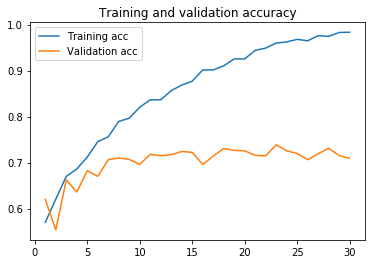

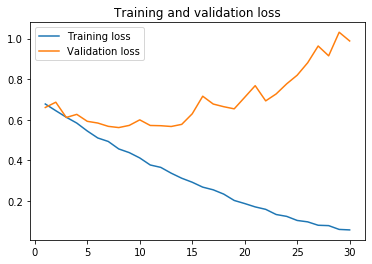

In [10]:
# Load Evan's model fit and estimation history
evans_model = models.load_model('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_1.h5')
with open('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_1_history.pickle', 'rb') as handle:
    evans_history = pickle.load(handle)

# Plot training and validation set loss and accuracy
acc = evans_history.history['acc']
val_acc = evans_history.history['val_acc']
loss = evans_history.history['loss']
val_loss = evans_history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

#### 6. Based on the plots of training and validation set performance above, suggest some possible next steps in the analysis.

We need to regularize the model.  We could do this by:

 * including fewer filters per layer
 * adding $L_2$ or $L_1$ regularization
 * adding dropout
 * adding data augmentation
 * reducing the dimensions of the input image

Note that we would not really want to reduce the number of layers with this input size, because that would mean we had **more** parameters in the first dense layer.

## Second Model
We will make two changes to our first model:

1. Add data augmentation.  In this case, we will use random rotations, shifts in width and height, shearing, zooming, and horizontal flips of the image.  This should help prevent overfitting by changing up the data our model sees during training.
2. Add dropout immediately before the first dense layer.  This should help because the result of Flattening the output from the last max pooling layer was of shape 6272; this led to a very large number of parameters for that dense layer.

In [0]:
datagen = image.ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

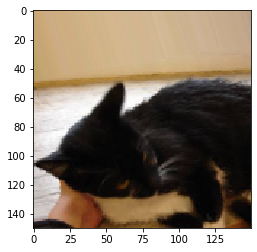

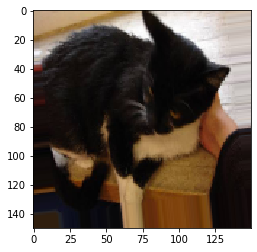

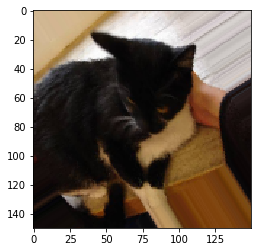

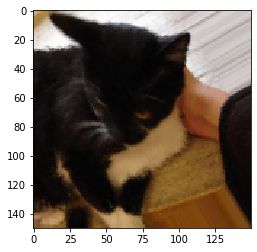

In [0]:
train_cats_dir = train_dir + "/cats"
fnames = [os.path.join(train_cats_dir, fname) for
     fname in os.listdir(train_cats_dir)]

img_path = fnames[5]

img = image.load_img(img_path, target_size=(150, 150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i == 4:
        break

plt.show()

#### 7. Add dropout before the first dense layer.
Below is the exact code I had from model 1 above.  Add a dropout layer with dropout rate 0.5 immediately before the first dense layer.

In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

## Your only change to this code is below this line
## Add a dropout layer here with dropout rate 0.5
model.add(layers.Dropout(0.5))
## Your only change to this code is above this line

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


#### 8. Set Up Data Augmentation and Run Estimation

The following code sets up generators to assemble mini-batches of training and validation data, with batch size 20.

In the training generator specification, add arguments specifying all the ways data augmentation should be done:

 * `rotation_range=40`: Rotate the image a random angle up to 40 degrees
 * `width_shift_range=0.2`: Shift the image left or right a random amount up to 20% of its width.
 * `height_shift_range=0.2`: Shift the image up or down a random amount up to 20% of its height.
 * `shear_range=0.2`: Maximum shear intensity (shear angle in counter-clockwise direction in degrees)
 * `zoom_range=0.2`: Zoom in up to 20%
 * `horizontal_flip=True`: Randomly flip inputs horizontally (or not).

You can see documentation for these options and more at https://keras.io/preprocessing/image/

Once you have set these options, you can run the code to do estimation for 3 epochs.  Again, this is slow (it took about 40 minutes to run for 100 epochs), so we'll just see that your code works and then load in my final model estimate to explore.

In [13]:
train_datagen = image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = image.ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

tic = time.time()
history2 = model.fit_generator(
      train_generator,
      steps_per_epoch= math.ceil(2000 / 32),
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)
toc = time.time()
toc - tic

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/100
63/63 [==============================] - 21s 337ms/step - loss: 0.6943 - acc: 0.4886 - val_loss: 0.6933 - val_acc: 0.4911
Epoch 2/100
63/63 [==============================] - 18s 284ms/step - loss: 0.6890 - acc: 0.5243 - val_loss: 0.6745 - val_acc: 0.5780
Epoch 3/100
63/63 [==============================] - 19s 294ms/step - loss: 0.6813 - acc: 0.5551 - val_loss: 0.6694 - val_acc: 0.5609
Epoch 4/100
63/63 [==============================] - 18s 285ms/step - loss: 0.6746 - acc: 0.5724 - val_loss: 0.6475 - val_acc: 0.6250
Epoch 5/100
63/63 [==============================] - 18s 284ms/step - loss: 0.6642 - acc: 0.6007 - val_loss: 0.7727 - val_acc: 0.5203
Epoch 6/100
63/63 [==============================] - 18s 289ms/step - loss: 0.6581 - acc: 0.5982 - val_loss: 0.6533 - val_acc: 0.6005
Epoch 7/100
63/63 [==============================] - 18s 282ms/step - loss: 0.6499 - acc: 0.6042 - val_loss: 0.6

1761.1470839977264

The code below saves the model fit.  You don't need these lines in your lab, this is how I saved the model and history for you to use in the next question of the lab.

In [0]:
model.save('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_2.h5')
with open('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_2_history.pickle', 'wb') as handle:
    pickle.dump(history2, handle)

The code below reads in my model fit and estimation history, and makes plots of the training and validation loss and accuracy across epochs.

You don't need to do anything with this code other than run it.

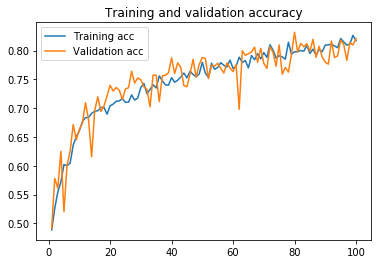

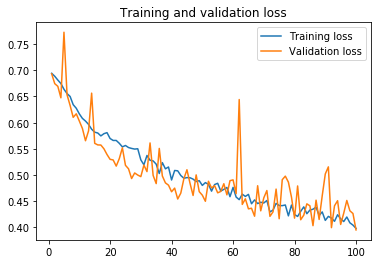

In [18]:
# Load Evan's model fit and estimation history
evans_model2 = models.load_model('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_2.h5')
with open('/content/drive/My Drive/stat344ne_cats_and_dogs_small/cats_and_dogs_small_2_history.pickle', 'rb') as handle:
    evans_history2 = pickle.load(handle)

# Plot training and validation set loss and accuracy
acc = evans_history2.history['acc']
val_acc = evans_history2.history['val_acc']
loss = evans_history2.history['loss']
val_loss = evans_history2.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training acc')
plt.plot(epochs, val_acc, label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()